# Classification - Titanic

Classificatore per il set di dati sui passeggeri del Titanic disponibile su Kaggle al seguente link: https://www.kaggle.com/c/titanic

Nel seguente Jupyter Notebook verrà realizzato un classificatore in grado di prevedere, con una certa accuratezza, la sopravvivenza o meno di ciascuno dei passeggeri in base alle loro caratteristiche.

Prima di tutto vengono importate le librerie necessarie alla realizzazione del classificatore

In [1]:
import nltk
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

Ora si va a caricare in memoria il set di dati, si fa uso di pandas per il caricamento e la gestione dei dati.

In [2]:
titanic = pd.read_csv('./titanic/train.csv')

Il set di dati ha il seguente schema:

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Di seguito viene riportato il significato delle variabili (preso da Kaggle):

    Variable      Definition	                                Key
    
    survival 	 Survival 	                                 0 = No, 1 = Yes
    pclass 	   Ticket class 	                             1 = 1st, 2 = 2nd, 3 = 3rd
    sex 	      Sex 	
    Age 	      Age in years 	
    sibsp 	    # of siblings / spouses aboard the Titanic 	
    parch 	    # of parents / children aboard the Titanic 	
    ticket 	   Ticket number 	
    fare 	     Passenger fare 	
    cabin 	    Cabin number 	
    embarked  	Port of Embarkation 	                     C = Cherbourg, Q = Queenstown, S = Southampton
    

Viene mostrata inoltre una statistica dei dati, per avere una visione più chiara e generale dei dati di cui stiamo trattando.

In [4]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Manipolazione e studio dei dati

Vengono caricati in memoria solamente i dati di training e non i dati di test, poichè non rappresentano la realtà e manca la colonna "Survived", che è quella che serve ad nltk per calcolare l'accuracy del classificatore. I dati di test vengono quindi ricavati dai dati di training secondo la seguente suddivisione:
- trainData: 80% dei record dei dati di training originali
- testData: 20% dei record rimanenti dei dati di training originali

Prima di andare i ricavare i due insiemi viene effettuato uno "shuffle" dei dati, in modo da introdurre randomicità. Il seme viene tenuto fisso per comodità nella selezione e studio dei parametri che viene effettuato sucessivamente, ma è possibile anche non specificarlo.

In [5]:
titanic = sklearn.utils.shuffle(titanic, random_state=2210)
titanic = titanic.reset_index()
titanic.drop(columns=['index', 'Ticket','Name'], inplace=True)
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,353,0,3,male,15.0,1,1,7.2292,NaN,C
1,160,0,3,male,NaN,8,2,69.5500,NaN,S
2,126,1,3,male,12.0,1,0,11.2417,NaN,C
3,437,0,3,female,21.0,2,2,34.3750,NaN,S
4,150,0,2,male,42.0,0,0,13.0000,NaN,S


Viene calcolato il 20% dei dati sul numero di record totali

In [6]:
testCount = int(len(titanic) * 0.2)
testCount

178

Ora è possibile ricavare i due insiemi di dati

In [7]:
testData = titanic[0:testCount]
trainData = titanic[testCount+1:]

### Analisi Esplorativa dei dati

Prima di procedere con lo sviluppo del classificatore è necessario effettuare un'analisi esplorativa dei
dati, per poter selezionare nella maniera più opportuna le features per il training del classificatore. Si va quindi ad analizzare il tasso di sopravvivenza in base alle determinate caratteristiche dei passeggeri.

Di seguito viene  mostrato lo scatter-plot relativo alle variabili, per avere una visione più generale della situazione.

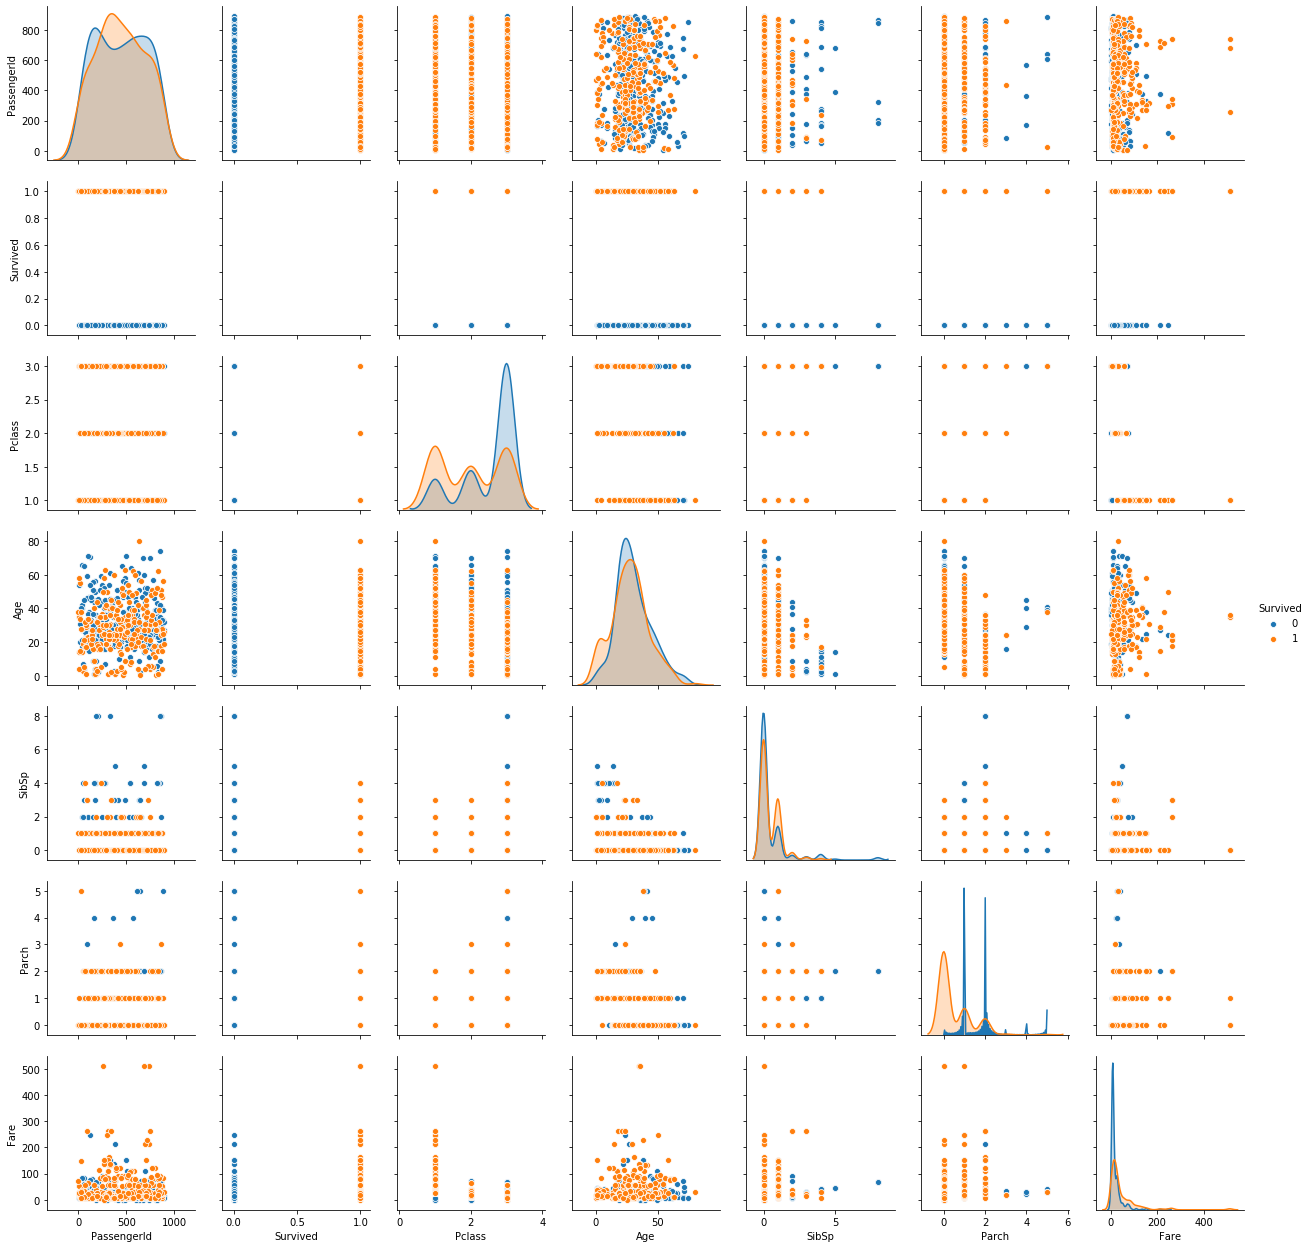

In [8]:
import warnings
warnings.filterwarnings("ignore")
sns.pairplot(trainData, hue='Survived')

Si vanno ora ad analizzare le variabili una ad una

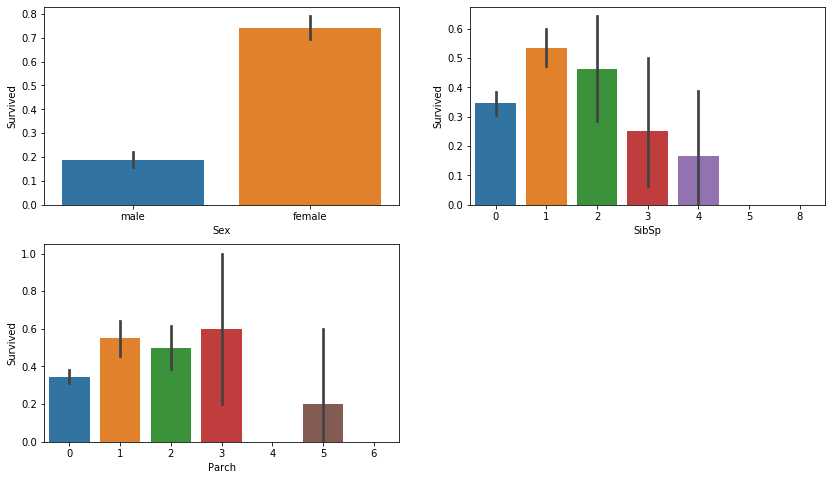

In [9]:
plt.figure(figsize=(14,8))

plt.subplot(221)
sns.barplot(x='Sex', y='Survived', data=titanic)
plt.subplot(222)
sns.barplot(x='SibSp', y='Survived', data=titanic)
plt.subplot(223)
sns.barplot(x='Parch', y='Survived', data=titanic)


Dal primo barplot si nota che sono sopravvissute molte più donne rispetto agli uomini (75% contro 25% circa).
Le variabili "SibSp" e "Parch" invece non sembrano essere molto significative, tuttavia è posibile ricavare alcune features che potrebbero risultare interessanti nella classificazione:

- Family_size = SibSp + Parch + 1
- alone = 1 if family_size == 1 0 otherwise

È possibile anche ricavare la feature "has_cabin" che va semplicemente ad identificare i passeggeri con la cabina o meno (1=ha la cabina, 0 = senza cabina).


Si va quindi a modificare il dataset "titanic" aggiungendo le colonne derivate, è necessario aggiornare anche i due dataset (training e test) ricavati precendentemente.


In [10]:
titanic['family_size'] = titanic['SibSp']+titanic['Parch']+1
titanic['has_cabin'] = titanic['Cabin'].apply(lambda x:0 if type(x)==float else 1)
titanic['alone'] = titanic['family_size'].apply(lambda x:1 if x==1 else 0)
testData = titanic[0:testCount]
trainData = titanic[testCount+1:]
titanic.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,family_size,has_cabin,alone
0,353,0,3,male,15.0,1,1,7.2292,NaN,C,3,0,0
1,160,0,3,male,NaN,8,2,69.5500,NaN,S,11,0,0
2,126,1,3,male,12.0,1,0,11.2417,NaN,C,2,0,0
3,437,0,3,female,21.0,2,2,34.3750,NaN,S,5,0,0
4,150,0,2,male,42.0,0,0,13.0000,NaN,S,1,0,1
5,164,0,3,male,17.0,0,0,8.6625,NaN,S,1,0,1
6,779,0,3,male,NaN,0,0,7.7375,NaN,Q,1,0,1
7,794,0,1,male,NaN,0,0,30.6958,NaN,C,1,0,1
8,646,1,1,male,48.0,1,0,76.7292,D33,C,2,1,0
9,313,0,2,female,26.0,1,1,26.0000,NaN,S,3,0,0


Vengono quindi mostrati i grafici di sopravvivenza relativi alle nuove caratteristiche derivate, viene anche studiata la colonna "Embarked"

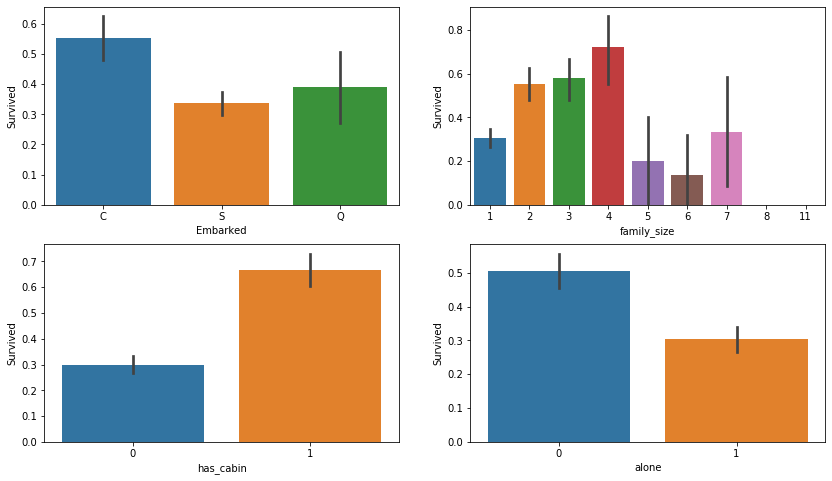

In [11]:
plt.figure(figsize=(14,8))

plt.subplot(221)
sns.barplot(x='Embarked', y='Survived', data=titanic)
plt.subplot(222)
sns.barplot(x='family_size', y='Survived', data=titanic)
plt.subplot(223)
sns.barplot(x='has_cabin', y='Survived', data=titanic)
plt.subplot(224)
sns.barplot(x='alone', y='Survived', data=titanic)

- La varibile "Embarked" mostra chiaramente che le persone imbarcate a Cherbourg hanno un tasso di sopravvivenza maggiore. 
- Le famiglie composte da 3-4 persone hanno una probabilità maggiore di sopravvivenza
- Le persone con una cabina hanno la probabilità di sopravvivenza di circa il 70%
- Le persone da sole ha un tasso di mortalità pari al doppio di quelle accompagnate

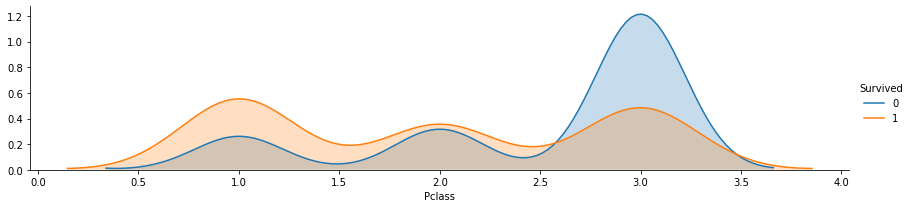

In [12]:
facetPlot2 = sns.FacetGrid(titanic, hue = 'Survived', aspect=4)
facetPlot2.map(sns.kdeplot, 'Pclass', shade= True )
facetPlot2.add_legend()

Anche la tipologia di classe in cui si trovano i passeggeri sembra avere un certo peso, infatti quello che si può notare da questo grafico è che in generale i passeggeri appartenenti alla prima classe sono sopravvissuti maggiormente, al contrario i passeggeri appartenenti alla terza classe hanno un tasso di mortalità di molto maggiore rispetto agli altri. Le variabili "Fare" e "Pclass" sono chiaramente correlate tra di loro. 

Analizzando i vari barplot, le variabili che risultano essere interessanti sono le sueguenti:
- Sex
- Pclass
- Embarked
- family_size
- has_cabin
- alone


Vengono infine analizzate alcune variabili che dallo scatter-plot sembrano essere interessanti.

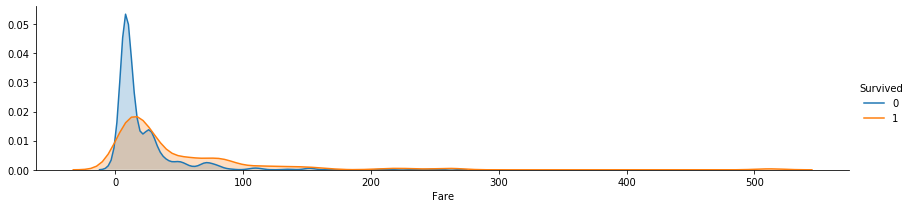

In [13]:
facetPlot = sns.FacetGrid(titanic, hue = 'Survived', aspect=4)
facetPlot.map(sns.kdeplot, 'Fare', shade= True )
facetPlot.add_legend()

La tariffa ("Fare") pagata dai passeggeri sembra avere un certo peso per quanto riguarda il tasso di sopravvivenza. Quello che risulta infatti è che nella fascia bassa ci sono molti più morti rispetto ai sopravvisuti, mentre nella fascia alta il comportamento si inverte. Il "Fare" può risultare quindi una feature interessante per il nostro classificatore.

## Gestione dei dati continui

I dati continui sono problematici da gestire per il nostro classificatore "NaiveBayes". Siccome due features che abbiamo scelto sono continue, abbiamo due possibilità:
- discretizzazione 
- utilizzare un classificatore che supporta dati continui es. Gaussian NaiveBayes. 

Siccome non si sa se la versione di NaiveBayes implementata da NLTK è in grado di supportare anche dati continui nella maniera opportuna (sarebbe necessario andare a studiare l'implementazione), si è deciso di utilizzare la discretizzazione. Uno dei metodi di discretizzazione principali è la suddivisione in categorie.

Caratteristiche continue:
- Age
- Fare

Per suddividere i dati continui in gruppi basta prendere in considerazione i quartili statistici, che sono facilmente ricavabili con la funzione apposita di pandas "describe".

In [14]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,family_size,has_cabin,alone
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.904602,0.228956,0.602694
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,1.613459,0.420397,0.489615
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000,0.000000,1.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,2.000000,0.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,11.000000,1.000000,1.000000


Si vanno quindi a prendere in considerazione quattro categorie per ogni variabile:

- Age:
    - 0: 0-25% (0-21)
    - 1: 25-50% (21-28)
    - 2: 50-75% (28-38)
    - 3: 75-100% (38-80)
- Fare:
    - 0: 0-25% (0-8)
    - 1: 25-50% (8-15)
    - 2: 50-75% (15-31)
    - 3: 75-100% (31-513)

In [15]:
titanic['AgeCat'] = 0
titanic.loc[titanic['Age']<=21, 'AgeCat']= 0
titanic.loc[(titanic['Age']>21) & (titanic['Age']<=28), 'AgeCat']= 1
titanic.loc[(titanic['Age']>28) & (titanic['Age']<=38), 'AgeCat']= 2
titanic.loc[(titanic['Age']>38) & (titanic['Age']<=80), 'AgeCat']= 3

# fa la stessa cosa, solo che permette facilmente di specificare anche in quante parti dividere il dataframe
#titanic['AgeCat'] = pd.qcut(titanic['Age'], 4)

titanic['FareCat'] = 0
titanic.loc[titanic['Fare']<=8, 'FareCat']= 0
titanic.loc[(titanic['Fare']>8) & (titanic['Fare']<=15), 'FareCat']= 1
titanic.loc[(titanic['Fare']>15) & (titanic['Fare']<=31), 'FareCat']= 2
titanic.loc[(titanic['Fare']>31) & (titanic['Fare']<=513), 'FareCat']= 3

#titanic['FareCat'] = pd.qcut(titanic['Fare'], 4)

testData = titanic[0:testCount]
trainData = titanic[testCount+1:]

titanic.head(10)


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,family_size,has_cabin,alone,AgeCat,FareCat
0,353,0,3,male,15.0,1,1,7.2292,NaN,C,3,0,0,0,0
1,160,0,3,male,NaN,8,2,69.5500,NaN,S,11,0,0,0,3
2,126,1,3,male,12.0,1,0,11.2417,NaN,C,2,0,0,0,1
3,437,0,3,female,21.0,2,2,34.3750,NaN,S,5,0,0,0,3
4,150,0,2,male,42.0,0,0,13.0000,NaN,S,1,0,1,3,1
5,164,0,3,male,17.0,0,0,8.6625,NaN,S,1,0,1,0,1
6,779,0,3,male,NaN,0,0,7.7375,NaN,Q,1,0,1,0,0
7,794,0,1,male,NaN,0,0,30.6958,NaN,C,1,0,1,0,2
8,646,1,1,male,48.0,1,0,76.7292,D33,C,2,1,0,3,3
9,313,0,2,female,26.0,1,1,26.0000,NaN,S,3,0,0,1,2


Di seguito vengono mostrati anche i grafici di sopravvivenza relativi ai nuovi parametri trovati

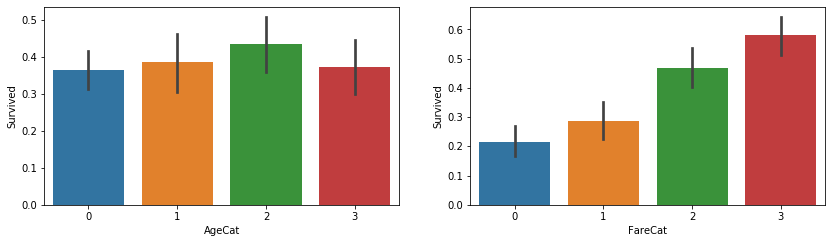

In [16]:
plt.figure(figsize=(14,8))

plt.subplot(221)
sns.barplot(x='AgeCat', y='Survived', data=titanic)
plt.subplot(222)
sns.barplot(x='FareCat', y='Survived', data=titanic)

- La variabile "AgeCat" non sembra avere una grande rilevanza
- La variabile "FareCat" invece mostra che i passeggeri appartenti alla categorie 2 e 3 di tariffe hanno una probabilità di sopravvivenza molto più alta rispetto alle categorie 0 e 1

Viene mostrata anche una heatmap, che in maniera grafica mette in evidenza quanto le variabili sono correlate tra di loro. 


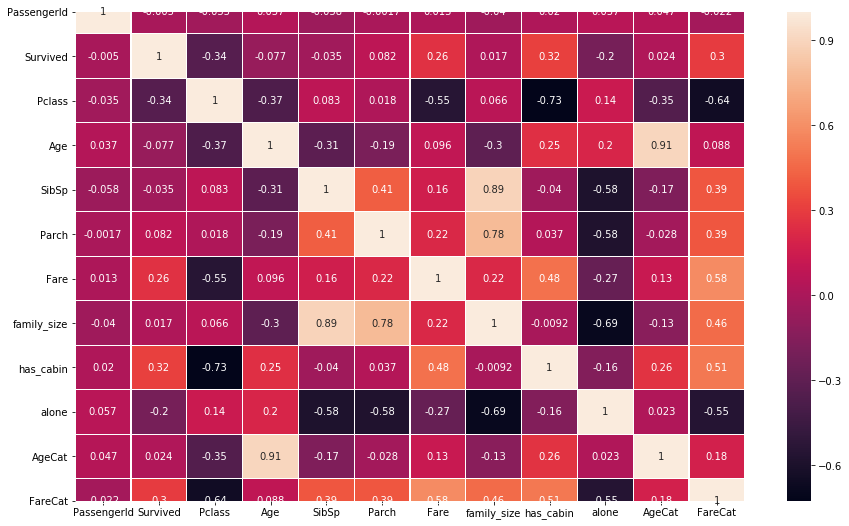

In [17]:
plt.figure(figsize=(15,9))
sns.heatmap(titanic.corr(),annot=True, linewidths=0.2)

## Implementazione del classificatore 

In questa sezione si va ad implementare il classificatore vero e proprio tenenedo conto delle feature studiate precendentemente.

Si va a definire la funzione che estrae le features di maggiore importanza dai passeggeri:

In [18]:
def passengers_features(passenger):
    featDict = {}
    featDict['Sex'] = passenger.Sex
    featDict['AgeCat'] = passenger.AgeCat
    featDict['Pclass'] = passenger.Pclass
    featDict['FareCat'] = passenger.FareCat
    featDict['family_size'] = passenger.family_size
    featDict['Embarked'] = passenger.Embarked
    featDict['has_cabin'] = passenger.has_cabin
    featDict['alone'] = passenger.alone
    return featDict

Ora va a creare il training set. Per ogni passeggero si applica la funzione appena definita.

In [19]:
trainSet = []
for passenger in trainData.itertuples():
    features = passengers_features(passenger)
    trainSet.append((features, passenger.Survived))

Si va a creare anche il test set allo stesso modo

In [20]:
testSet = []
for passenger in testData.itertuples():
    features = passengers_features(passenger)
    testSet.append((features, passenger.Survived))

### Training del classificatore

Ora è possibile istanziare il classificatore selezionato, in questo caso "NaiveBayes" ed avviare il training con la funzione apposita utilizzando il training-set

In [21]:
classifier = nltk.NaiveBayesClassifier.train(trainSet)

### Testing del classificatore

Una cosa fondamentale quando si lavora con i classificatori è il testing. La "bontà" di un classificatore è tipicamente data dalla percentuale di accuratezza che questo presenta nel classificare i dati. Precedentemente abbiamo riservato proprio il 20% dei nostri dati, al testing. Nltk mette a disposizione un metodo dedicato che va a calcolare l'accuratezza del classificatore e ci semplifica di molto il testing del nostro classificatore.

In [22]:
print("accuratezza: ", nltk.classify.accuracy(classifier, testSet))

accuratezza:  0.7078651685393258


Si è ottenuta una accuratezza di circa del 71%, che non è male per i dati che stiamo trattanto, ma è certamente migliorabile.

Possiamo anche verificare facilmente quali sono state le features più rilevanti nella classificazione. In questo caso si vanno a riportare le prime dieci features rilevanti:

In [23]:
classifier.show_most_informative_features(10)

Most Informative Features
             family_size = 4                   1 : 0      =      6.8 : 1.0
                     Sex = 'female'            1 : 0      =      4.8 : 1.0
               has_cabin = 1                   1 : 0      =      3.3 : 1.0
             family_size = 6                   0 : 1      =      2.8 : 1.0
             family_size = 3                   1 : 0      =      2.8 : 1.0
                     Sex = 'male'              0 : 1      =      2.7 : 1.0
                  Pclass = 1                   1 : 0      =      2.6 : 1.0
                 FareCat = 0                   0 : 1      =      2.4 : 1.0
                 FareCat = 3                   1 : 0      =      2.3 : 1.0
             family_size = 5                   0 : 1      =      2.0 : 1.0


Le features che sono risultate più rilevanti nella classificazione sono quindi:
- family_size
- Sex
- has_cabin
- Pclass
- FareCat

si prova quindi andare a ridefine la funzione estrattrice delle caratteristiche come segue:

In [24]:
def passengers_features(passenger):
    featDict = {}
    featDict['Sex'] = passenger.Sex
    #featDict['AgeCat'] = passenger.AgeCat
    featDict['Pclass'] = passenger.Pclass
    featDict['FareCat'] = passenger.FareCat
    featDict['family_size'] = passenger.family_size
    #featDict['Embarked'] = passenger.Embarked
    featDict['has_cabin'] = passenger.has_cabin
    #featDict['alone'] = passenger.alone
    return featDict

Si va ora a ritestare il classificatore, per verificare se l'accuratezza è migliorata o meno:

In [25]:
trainSet = []
for passenger in trainData.itertuples():
    features = passengers_features(passenger)
    trainSet.append((features, passenger.Survived))
testSet = []
for passenger in testData.itertuples():
    features = passengers_features(passenger)
    testSet.append((features, passenger.Survived))
print("accuratezza: ",nltk.classify.accuracy(classifier, testSet))

accuratezza:  0.7247191011235955


L'accuratezza sembra essere aumentata, ma non di tanto.

Dopo qualche tentativo, il classificatore sembra raggiungere la sua massima accuratezza con tutte le features selezionate tranne "AgeCat" e "FareCat". Provando quindi a reinserire le altre  caratteristiche l'accuratezza del classificatore finalmente aumenta, risultano quindi avere anche loro una certa importanza nella classificazione, anche se minima.

In [26]:
def passengers_features(passenger):
    featDict = {}
    featDict['Sex'] = passenger.Sex
    #featDict['AgeCat'] = passenger.AgeCat
    featDict['Pclass'] = passenger.Pclass
    #featDict['FareCat'] = passenger.FareCat
    featDict['family_size'] = passenger.family_size
    featDict['Embarked'] = passenger.Embarked
    featDict['has_cabin'] = passenger.has_cabin
    featDict['alone'] = passenger.alone
    return featDict

trainSet = []
for passenger in trainData.itertuples():
    features = passengers_features(passenger)
    trainSet.append((features, passenger.Survived))
testSet = []
for passenger in testData.itertuples():
    features = passengers_features(passenger)
    testSet.append((features, passenger.Survived))
print("accuratezza: ",nltk.classify.accuracy(classifier, testSet))

accuratezza:  0.7808988764044944


Il classificatore realizzato riesce quindi a prevedere il tasso di sopravvivenza di un passeggero con una accuratezza del 78,1%, si è ottenuto quindi un miglioramento di un 7/8% sull'accuratezza nella classificazione.